## Exam 2: Pandas, Vizualisation, Linguistic Preprocessing, Machine Learning

#### Student name: Clémentine Bleuze.

- The exam has 18 questions. 
- The exam is designed so that you do not need to do all questions sequentially. In other words, if you fail to complete a given question, it it still possible to move on and do some of the other questions. 
- The exams is structured into 6 sections
   - A. File handling (1 exercise, 3 points)
   - B. Pandas dataframe (6 exercises, 9 points)
   - C. Vizualisation (3 exercises, 8 points)
   - D. Tokenization and Sentence Segmentation (2 exercises, 6 points)
   - E. Statistics (2 exercises, 4 points)
   - F. Classification (4 exercises, 10 points)

In [1]:
# All imports
import os
import pandas as pd
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### A. File Handling
- Printing out the names of the files contained in a directory

#### Exercise 1.  Write code that output the list of files present in the data directory (3 points)

The expected output is:

chatgpt_fullwiki_eval.csv   
pg_dyn_fullwiki_rl3_eval.csv   
para_led_fullwiki_rl3_eval.csv   
ctrl_conbart_dyn_fullwiki_rl3_eval.csv   
para_led_dyn_fullwiki_rl3_eval.csv

In [2]:
datadir = "eval/"

# Print the name of all files contained in the data directory
for filename in os.listdir(datadir):
    print(filename)

chatgpt_fullwiki_eval.csv
ctrl_conbart_dyn_fullwiki_rl3.csv
para_led_dyn_fullwiki_rl3.csv
pg_dyn_fullwiki_rl3.csv


### B. Pandas Dataframe
- Loading and Examining some data
- Producing the average value for a column

#### Exercise 2.  Load the file chatgpt_fullwiki_eval.csv  into a panda dataframe (1 point)

In [3]:
# We will directly read the data into a pandas DataFrame directly from the .csv file
df = pd.read_csv(datadir + "chatgpt_fullwiki_eval.csv")

# Checking everything is ok
df.head()

,title,pair_id,complex,simple,para_id,c_len,s_len,p_len,num_c_sents,num_s_sents,max_p_len,category,common_category,num_paras,subject,qafacteval,pred,summac,qafacteval_r
0,John Shaft,42044,['John Shaft I is a fictional character create...,"['John Shaft is a fictional character.', 'He i...","[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4]",358,109,"[160, 77, 55, 54, 12]",11,8,160,"['film character', 'literary character', 'fict...",fictional human,5,biographical,3.665564,John Shaft is a famous fictional character cre...,0.391310,2.607325
1,Acronis,51633,"['Acronis International GmbH, simply referred ...",['Acronis Inc. is an American software company...,"[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, ...",745,209,"[118, 89, 60, 73, 55, 48, 89, 84, 129]",27,9,129,"['software company', 'business', 'technology c...",business,9,industry,2.352182,Acronis is a technology company with headquart...,0.527585,0.702490
2,Tower Commission,86530,['The Tower Commission was commissioned on Dec...,['The Tower Commission was created on 26 Novem...,"[0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 7, 7]",513,157,"[110, 98, 113, 32, 23, 73, 29, 35]",15,4,113,['organization'],organization,8,industry,4.422851,The Tower Commission was set up by President R...,0.608918,2.246722
3,WWE SmackDown vs. Raw 2007,47683,"[""WWE SmackDown vs. Raw 2007 is a professional...",['WWE SmackDown vs. Raw 2007 is a wrestling vi...,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...",1859,159,"[136, 86, 121, 70, 83, 94, 25, 89, 48, 46, 50,...",66,6,164,['video game'],video game,23,media,2.961381,WWE SmackDown vs. Raw 2007 is a wrestling vide...,0.878862,0.671188
4,Bassoles-Aulers,52013,['Bassoles-Aulers is a commune in the departme...,"['Bassoles-Aulers is a commune.', 'It is found...","[0, 1, 2, 2, 2, 2, 2, 3, 4, 5]",283,34,"[34, 25, 159, 30, 19, 16]",10,2,159,['commune of France'],commune of France,6,location,3.582690,Bassoles-Aulers is a town in the Aisne departm...,0.443724,2.871982


#### Exercise 3. Print out the columns headers  (1 point)

In [4]:
print(f"Columns of the considered dataset are: {list(df.columns)}")

Columns of the considered dataset are: ['title', 'pair_id', 'complex', 'simple', 'para_id', 'c_len', 's_len', 'p_len', 'num_c_sents', 'num_s_sents', 'max_p_len', 'category', 'common_category', 'num_paras', 'subject', 'qafacteval', 'pred', 'summac', 'qafacteval_r']


#### Exercise 4. Print out the number of rows and columns (1 point)

In [5]:
sh = df.shape
print(f"The dataset contains {sh[0]} rows and {sh[1]} columns.")

The dataset contains 1000 rows and 19 columns.


#### Exercise 5. Print out the set of subjects which occur in the 'subject' (2 points)

- Note: We are asking for a set so the subject types, not the subject occurrences 
- Expected result: 'biographical', 'industry', 'media', 'location', 'science'
- Hint: is you use the correct pandas method, this can be done in one short line

In [6]:
# The function 'unique' allows to do this directly
subjects = list(pd.unique(df["subject"]))
print(f"The dataset contains {len(subjects)} different subjects: {subjects}.")

The dataset contains 5 different subjects: ['biographical', 'industry', 'media', 'location', 'science'].


#### Exercise 6. Print out the number of items belonging to each  subjects (2 points)

- Hint: is you use the correct pandas method, this can be done in one short line
- Expected result:  

biographical    200   
industry        200   
location        200   
media           200   
science         200   

In [7]:
# This is done using the function 'value_counts'
print(df["subject"].value_counts())

biographical    200
industry        200
media           200
location        200
science         200
Name: subject, dtype: int64


#### Exercise 7.  Compute and print out the average value for the "qafacteval" and the "summac" columns in the dataframe you created (2 points)

Expected results: 

QAFactEval: 3.612652418367106   
SUMMAC: 0.7333019569516182

In [10]:
# This is done using the 'mean' function
me = df[["qafacteval", "summac"]].mean()
print(me)

qafacteval    3.619174
summac        0.503797
dtype: float64


## C. Visualisation
We now use the data from the  chatgpt_fullwiki_eval.csv file  (or the dataframe you created in Exercise 2) to create some vizualisations
- Note: the "c_len" columns stores the length of complex sentences

There are 3 exercises:
- Exercise 8. Create the histogram for "c_len' (the length of complex sentences) 
- Exercise 9. Create a similar histogram but considering only sentences which come from the "media" subject
- Exercise 10. Create 5 histograms for "c_len', one for each of the five subjects, with the subject as title

#### Exercise 8.  Create the histogram for the "c_len" columns (3 points)
- The data is contained in the file chatgpt_fullwiki_eval.csv (and the dataframe you created in the previous exercises)
- Note: the "c_len" columns stores the length of complex sentences 

Text(0.5, 0, 'c_len')

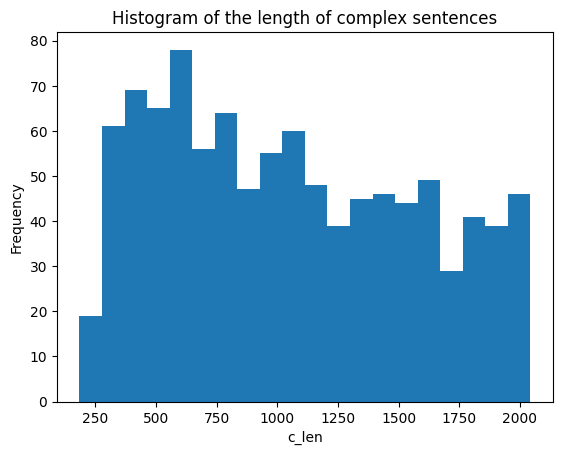

In [12]:
# Histogram plot for c_len on all the data
df["c_len"].plot.hist(bins=20)
plt.title("Histogram of the length of complex sentences")
plt.xlabel("c_len")

#### Exercise 9.  Create the histogram for "c_len' (the length of complex sentences) only for those items  whose subject belong to the 'media' category (3 points)

Text(0.5, 0, 'c_len')

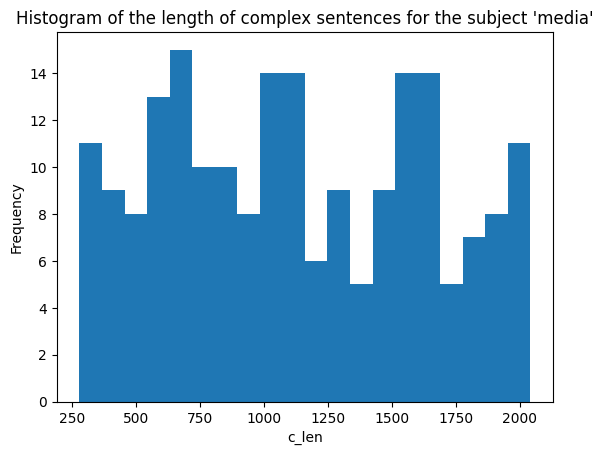

In [13]:
# Same histogram but only for the subject "media"
df["c_len"][df["subject"] == "media"].plot.hist(bins=20)
plt.title("Histogram of the length of complex sentences for the subject 'media'")
plt.xlabel("c_len")

#### Exercise 10.  Create the histogram for "c_len' (the length of complex sentences) for each of the five subjects  with the subject as title (2 points)

(0.0, 1.0, 0.0, 1.0)

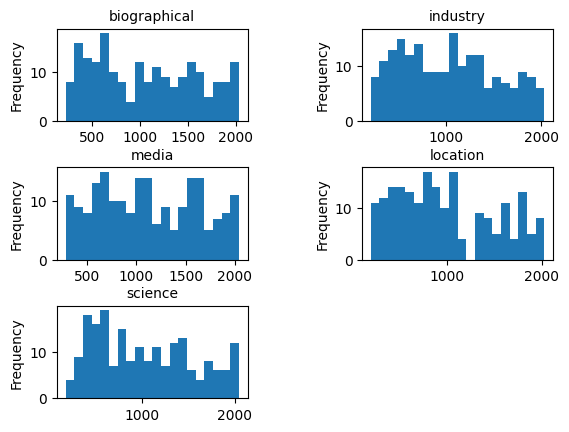

In [29]:
# Version 1: as multiple histograms
fig, ax = plt.subplots(3,2)
# Add some space between the subplots for readability of the titles and legends
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, subj in enumerate(pd.unique(df["subject"])):

    r = i // 2
    c = i % 2

    ax[r,c].set_title(subj, fontsize=10)
    
    df["c_len"][df["subject"] == subj].plot.hist(bins=20, ax=ax[r,c])

# Hide the last subplot
ax[2,1].axis('off')

Text(0.5, 1.0, 'Histogram of the length of the context by subject')

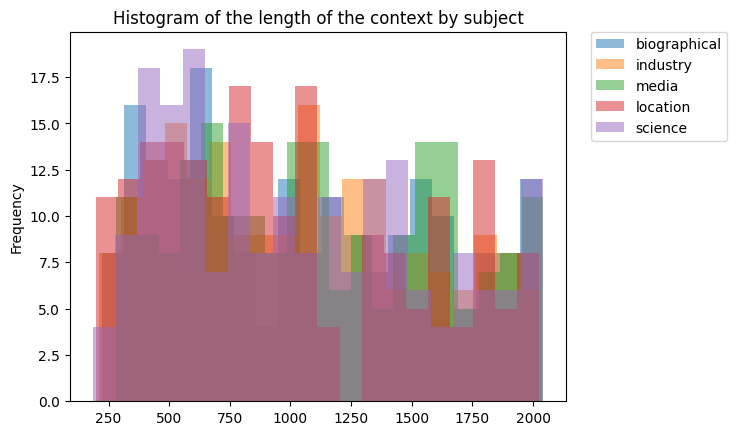

In [30]:
# Version 2: As a single histogram

for subj in pd.unique(df["subject"]):
    df["c_len"][df["subject"] == subj].plot.hist(bins=20, alpha=0.5, label=subj)

# Adding the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Histogram of the length of the context by subject")

## D. Tokenization and Sentence Segmentation

In [31]:
df = pd.read_csv("wnlg_results.csv",on_bad_lines='skip')
df["text"] = df["text"].fillna("")
df.columns

Index(['id', 'mr', 'team', 'text', 'category', 'type', 'bleu', 'meteor', 'ter',
       'systemtype', 'triplesize', 'fluency', 'grammar', 'semantics'],
      dtype='object')

In [32]:
df.head()

,id,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize,fluency,grammar,semantics
0,1,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,adapt,"the 29075 club is the dictcoverer, carl a. wir...",CelestialBody,unseen,0.041,0.185956,90.909,neural,1triple,1.666667,1.666667,1.333333
1,2,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,baseline,the administrative government is governed by t...,CelestialBody,unseen,0.034,0.046764,90.909,neural,1triple,2.750000,2.750000,1.000000
2,3,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,melbourne,1950 da is carl a. wirtanen.,CelestialBody,unseen,0.066,0.320360,81.818,neural,1triple,2.000000,2.333333,1.000000
3,4,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,pkuwriter,carl a. wirtanen discovered (29075) 1950 da.,CelestialBody,unseen,0.045,0.561305,54.545,neural,1triple,3.000000,2.666667,2.333333
4,5,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,tilburg-nmt,the chair of (29075) 1950 da is carl a. wirtanen.,CelestialBody,unseen,0.076,0.430547,81.818,neural,1triple,1.750000,2.250000,1.500000


#### Exercise 11. Extend the df dataframe created above with two columns named "num_tokens" and "num_sents" (4 points)

- For each row in the df dataframe created above, compute the number of tokens and of sentences appearing in the 'text' column
- Add the result in the corresponding new columns

The headers of your dataframe should now look like this:

['id', 'mr', 'team', 'text', 'category', 'type', 'bleu', 'meteor', 'ter',
       'systemtype', 'triplesize', 'fluency', 'grammar', 'semantics',
       'num_tokens', 'num_sentences']

In [33]:
# We will need a linguistic library to count the sentences and tokens
# Here I choose nltk

In [34]:
# We can use pandas function 'apply'
df["num_tokens"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df[["text", "num_tokens", "num_sentences"]].head()

,text,num_tokens,num_sentences
0,"the 29075 club is the dictcoverer, carl a. wir...",11,1
1,the administrative government is governed by t...,10,1
2,1950 da is carl a. wirtanen.,7,1
3,carl a. wirtanen discovered (29075) 1950 da.,10,1
4,the chair of (29075) 1950 da is carl a. wirtanen.,13,1


#### Exercise 12. Create boxplots for the number of tokens produced by each of the four type of systems (2 points)

The "systemtype" column indicates a system type (the type of system used to generate to sentences). 
There are 4 system types ('neural', 'template', 'smt', 'human'). 

- Create a boxplot for each system type and assign it the correponding title

In [36]:
# Checking the different types of systems
systems = list(pd.unique(df["systemtype"]))
print(systems)

['neural', 'template', 'smt', 'human']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


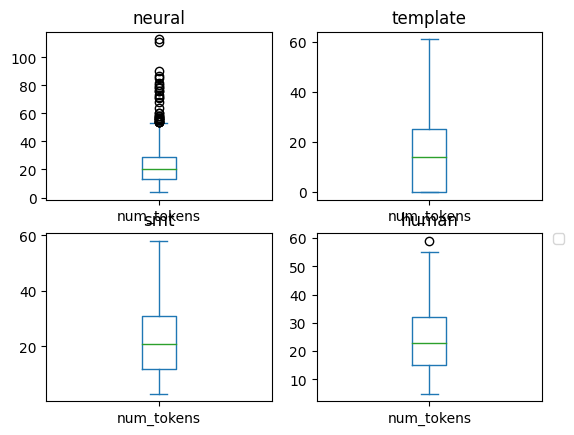

In [37]:
# Version 1: as multiple boxplots
fig, ax = plt.subplots(2, 2)

for i, sys in enumerate(systems):
    
    r = i // 2
    c = i % 2

    ax[r,c].set_title(sys)
    
    # Plot the corresponding boxplot
    df["num_tokens"][df["systemtype"] == sys].plot.box(ax=ax[r,c])

# Add the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

<AxesSubplot: title={'center': 'num_tokens'}, xlabel='systemtype'>

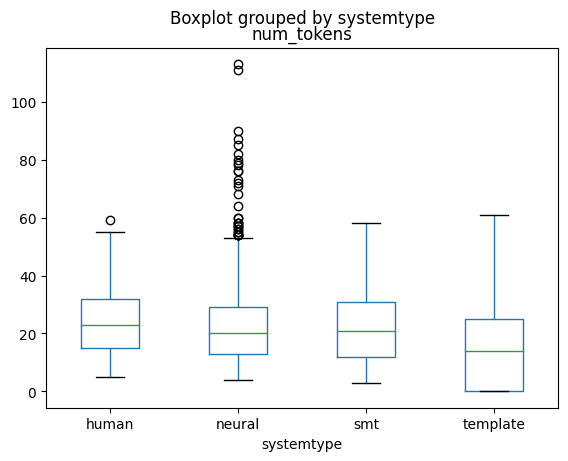

In [38]:
# Version 2: as a single boxplot
df.boxplot(column="num_tokens", by="systemtype", grid = False)

## E. Statistics

Correlation and scatter plots

#### Exercise 13.  Compute the correlation between number of tokens and number of sentences (2 points)
- Note: if you did not do Exercise 11, you can load the "tokens_and_sentences.csv" file and use its "num_tokens" and "num_sentences" columns as input values.

In [39]:
df[["num_tokens", "num_sentences"]].corr()
# So we see a 0.74 (positive) correlation between the number of tokens and sentences. This is not surprising,
# as we intuitively expect that the more sentences there are, the more tokens there are.
# NB: this is, by default, the pearson correlation.

,num_tokens,num_sentences
num_tokens,1.000000,0.740418
num_sentences,0.740418,1.000000


#### Exercise 14.  Compute a scatter plot where x is the number of tokens and y the number of sentences (2 points)
- Note: if you did not do Exercise 11, you can load the "tokens_and_sentences.csv" file and use its "num_tokens" and "num_sentences" columns as input values.

Text(0.5, 1.0, 'Scatter plot of the number of tokens and sentences')

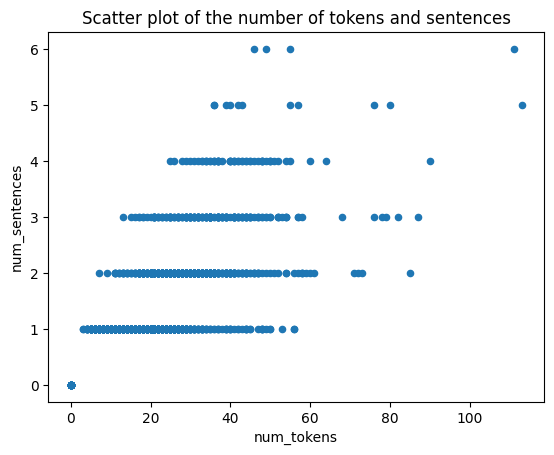

In [40]:
df[["num_tokens", "num_sentences"]].plot.scatter(x = "num_tokens", y = "num_sentences")
plt.title("Scatter plot of the number of tokens and sentences")

## F. Classification

Classify answers from the ELI Reddit corpus.   
- The ELI Reddit corpus gathers question/answer pairs from the "Explain Like I am 5" Reddit forum.
- In the eli5questions.csv file, the "answer" column is the text of an answer and the "topic" column indicates the topic of the answer which is either 'Chemistry', 'Other' or 'Physics

In [41]:
df = pd.read_csv("eli5questions.csv")
df.iloc[1]

id                                                        1
answer    In Europe you have the time of bottling printe...
score                                                1400.0
topic                                             Chemistry
Name: 1, dtype: object

In [42]:
df.columns

Index(['id', 'answer', 'score', 'topic'], dtype='object')

In [43]:
df.iloc[1]

id                                                        1
answer    In Europe you have the time of bottling printe...
score                                                1400.0
topic                                             Chemistry
Name: 1, dtype: object

In [44]:
df['topic'].unique()

array(['Chemistry', 'Other', 'Physics'], dtype=object)

In [45]:
df.head()

,id,answer,score,topic
0,0,Whoever said that is wrong.The FDA and IWBA ca...,14100.0,Chemistry
1,1,In Europe you have the time of bottling printe...,1400.0,Chemistry
2,2,I’d hate to be “that guy” but I was looking an...,47.0,Chemistry
3,3,I've heard of several studies that conclude th...,195.0,Chemistry
4,4,UV and heat will degrade the material however.,15.0,Chemistry


#### Exercise 15. Add a "label" column  (4 points)
- Machine learning only works on numbers so to train the classifier we need to convert the text labels (Chemistry, Physics, Others) to integers the idea being that each topic is assigned to a unique interger e.g., 1 for 'Chemistry', 1 for "Other" and 3 for "Physics". The exercise requires you to create a 'label' column whose content is the topic of the answers in their integer form .
- To help you out I outline how this can be done in 3 steps. Feel free to do it differently if you wish.

In [46]:
# Collecting topics
topics = list(df['topic'].unique())

# Creating an indexing dictionary
d = {}
for i, t in enumerate(topics):
    d[t] = i + 1 # because I'd rather start at 1 than 0

# Converting topics into integers
df["label"] = df["topic"].apply(lambda t: d[t])

In [47]:
print(d)

{'Chemistry': 1, 'Other': 2, 'Physics': 3}


In [48]:
df.head()

,id,answer,score,topic,label
0,0,Whoever said that is wrong.The FDA and IWBA ca...,14100.0,Chemistry,1
1,1,In Europe you have the time of bottling printe...,1400.0,Chemistry,1
2,2,I’d hate to be “that guy” but I was looking an...,47.0,Chemistry,1
3,3,I've heard of several studies that conclude th...,195.0,Chemistry,1
4,4,UV and heat will degrade the material however.,15.0,Chemistry,1


#### Exercise 16.  Create training and test data (2 points)
- The classifier takes as input a text x and output a topic label e.g., 1, 2 or 3. 
- To train the classifier we need X, a list of texts (from the 'answer' column) and Y, the corresponding list of integer labels (from the 'label' column)
- Extract texts (answers) and labels from the dataframe and split the resulting data into train and test

**Note:** If you did not do Exercise 15, use the code below to load the text and label data directly from the eli5_with_labels.csv file

In [77]:
# df.to_csv('eli5_with_labels.csv', encoding='utf-8', index = False)
# df = pd.read_csv("eli5_with_labels.csv", sep = ",")
# df.columns

In [49]:
# before splitting, we need to shuffle the data
from sklearn.utils import shuffle
df = shuffle(df, random_state = 42)

X = df["answer"] # the input
Y = df["label"] # the output

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1736,)
(434,)
(1736,)
(434,)


#### Exercise 17. Vectorize the data (2 points)

In [52]:
# We will vectorize the data using Tf Idf
vect = TfidfVectorizer(stop_words="english",
                       tokenizer = nltk.word_tokenize,
                       use_idf= True)

# Fit and transform the vectorizer on the training set and the test set
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [53]:
feats = vect.get_feature_names_out()
print(len(feats), feats)

11908 ['!' '#' '$' ... '😉' '😭' '🥇']


In [54]:
## We see that we have a very large number of features (11874). In parallel, I will replicate the experiment,
# This time using only 500 features, in order to see if this affects the results. Actually, some pre-precessing
# (removing punctuation for instance) could help reduce the total number of features.

red_vect = TfidfVectorizer(stop_words="english",
                        tokenizer = nltk.word_tokenize,
                        max_features=500,
                        use_idf= True)

red_X_train_vect = red_vect.fit_transform(X_train)
red_X_test_vect = red_vect.transform(X_test)

In [55]:
print(X_train_vect.shape, red_X_train_vect.shape)

(1736, 11908) (1736, 500)


#### Exercise  18. Train a Perceptron model, apply it to the test data and print out the accuracy (2 points)

In [56]:
# All features
# create a perceptron object
p = Perceptron(random_state=42)

# train the perceptron
p.fit(X_train_vect, Y_train)

# test the model
Y_pred = p.predict(X_test_vect) 

# print expected vs predicted
pred_vs_exp = pd.DataFrame({"expected": Y_test, "predicted": Y_pred})
print(pred_vs_exp.head())

# print accuracy
print("\nAccuracy: ", accuracy_score(Y_test, Y_pred))

      expected  predicted
285          1          1
890          2          1
592          1          2
1180         2          1
1608         3          3

Accuracy:  0.6889400921658986


In [57]:
# Now using only 500 features
# create a perceptron object
p = Perceptron(random_state=42)

# train the perceptron
p.fit(red_X_train_vect, Y_train)

# test the model
Y_pred = p.predict(red_X_test_vect) 

# print expected vs predicted
pred_vs_exp = pd.DataFrame({"expected": Y_test, "predicted": Y_pred})
print(pred_vs_exp.head())

# print accuracy
print("\nAccuracy: ", accuracy_score(Y_test, Y_pred))
print("This is a lower accuracy than with all features")

      expected  predicted
285          1          1
890          2          1
592          1          2
1180         2          1
1608         3          3

Accuracy:  0.5184331797235023
This is a lower accuracy than with all features
